# Задание 1

## Постановка задачи
Из постановки задачи (про кроликов) и пояснения к ней можно понять, что на самом деле над дан ветвящий процесс Гальтона-Ватсона $X_n$ с законом разможнения $\xi \sim Geom(p)$. То есть
$$X_0 = 1$$
$$X_n = \sum_{i = 1}^{X_{n - 1}} \xi_i^{(n)}$$,
где $\xi_i^{(n)}$ -- независимые распределенные по закону $\xi$.

Заметим, что $P(\xi = n) = (1-p)^np = q^np$ для $q = 1 - p$

## Вероятность вырождения
Найдём производящую функцию случайной величины $\xi$.
$$\varphi_{\xi}(z) = \mathsf{E} z^{\xi} = \sum_{n = 0}^{\infty} P(\xi = n) z^n = p\sum_{n = 0}^{\infty}q^nz^n = \frac{p}{1 - qz}$$

Из курса случайных процессов известно, что вероятность вырождения -- это либо корень уравнения $s = \varphi_{\xi}(s)$ на полуинтервал $[0, 1)$, если он существует, либо 1.

Значит, будем решать уравнение $s = \frac{p}{1 - qs}$ относительно $s$. Решение это уравнения -- это $1$ (если $p \neq 0$) и $\frac{p}{q}$ (если $p \neq 1$). Значит, вероятность вырождения -- это $\min \{\frac{p}{q}, 1\}$

## Моделирование процесса
Сначала смоделируем этот процесс для некоторых p. Поскольку график процесса при фиксированном $\omega \in \Omega$ нам ни о чём не расскажет, лучше нарисуем $\overline X_n$ (выборочное среднее для выборки из $sample$ случайных реализаций процесса) при различных $p$.

[1.0, 11.550000000000001, 99.030000000000001, 882.53999999999996, 7960.2700000000004, 71590.919999999998, 644325.38]


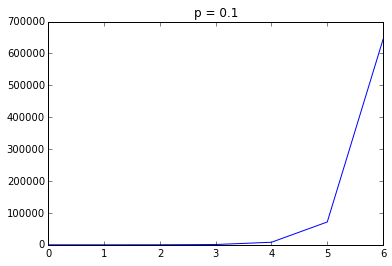

[1.0, 4.1900000000000004, 17.469999999999999, 73.120000000000005, 289.77999999999997, 1159.4400000000001, 4635.4099999999999]


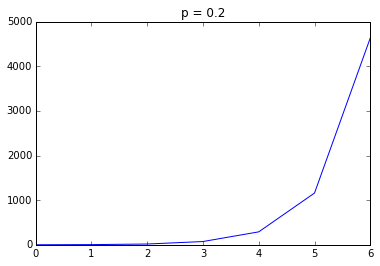

[1.0, 2.1299999999999999, 4.9900000000000002, 12.58, 28.73, 69.170000000000002, 159.02000000000001]


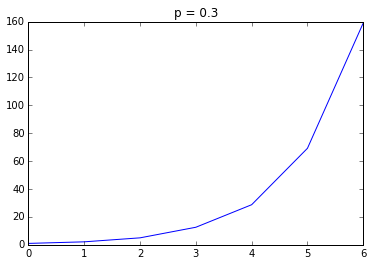

[1.0, 1.3799999999999999, 2.1499999999999999, 3.46, 5.2999999999999998, 8.2899999999999991, 11.77]


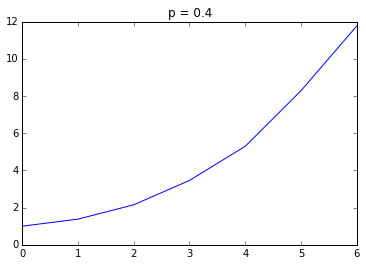

[1.0, 1.1100000000000001, 1.04, 1.04, 0.98999999999999999, 0.81000000000000005, 0.71999999999999997]


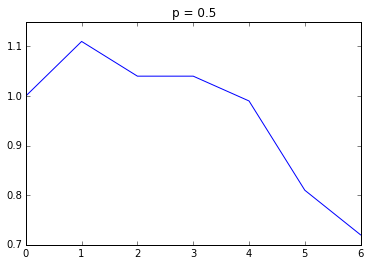

[1.0, 0.78000000000000003, 0.40999999999999998, 0.29999999999999999, 0.16, 0.13, 0.050000000000000003]


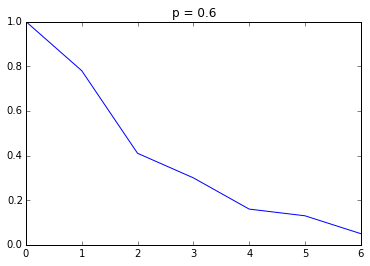

[1.0, 0.40000000000000002, 0.17000000000000001, 0.10000000000000001, 0.040000000000000001, 0.059999999999999998, 0.0]


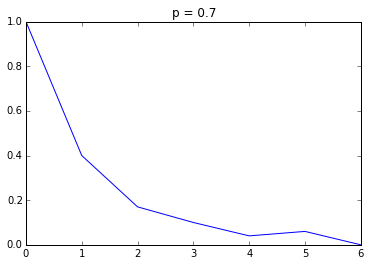

[1.0, 0.26000000000000001, 0.11, 0.01, 0.02, 0.01, 0.0]


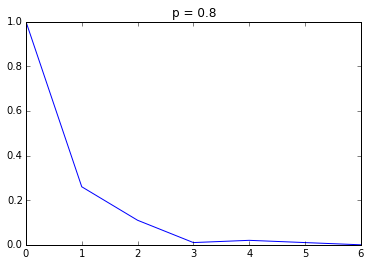

[1.0, 0.14999999999999999, 0.01, 0.0, 0.0, 0.0, 0.0]


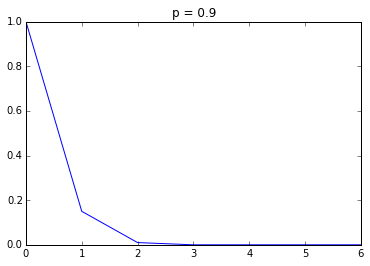

In [1]:
%matplotlib inline
from scipy.stats import geom
from functools import partial
import matplotlib.pyplot as plot

def nth_generation(p, n):
    sample = geom.rvs(p, size = n)
    return sum(sample) - n

def galton_watson(gen_function, max_size):
    X = [1]
    for i in range(1, max_size):
        X.append(gen_function(X[i - 1]))
    return X

P = [k / 10 for k in range(1, 10)]
max_gen = 7
samples = 100
for p in P:
    plot.figure()
    plot.title("p = " + str(p))
    X = galton_watson(partial(nth_generation, p), max_gen)
    for sample in range(1, samples):
        Y = galton_watson(partial(nth_generation, p), max_gen)
        for i in range(0, len(X)):
            X[i] += Y[i]
    for i in range(0, len(X)):
        X[i] /= 100
    print(X)
    plot.plot(X)
    plot.show()

Видно, что при $p > 0.5$ процесс в среднем случае разрастается, при $p < 0.5$ он затухает, а при $p = 0.5$ ведёт себя нестабильно (в среднем случае)

## Моделирование вероятности вырождения

In [76]:
max_count = 300
samples = 2000
def apocalypse_probability(p):
    bad_planets = 0
    for planet in range(samples):
        X = 1
        while X in range(1, max_count):
            X = nth_generation(p, X)
        if X == 0:
            bad_planets += 1.0
    return bad_planets / samples

for p in P:
    print("(p, experimental, theoretical) = " + str((p, apocalypse_probability(p), min(p / (1 - p), 1))))

(p, experimental, theoretical) = (0.05, 0.048, 0.052631578947368425)
(p, experimental, theoretical) = (0.1, 0.1, 0.11111111111111112)
(p, experimental, theoretical) = (0.15, 0.19, 0.17647058823529413)
(p, experimental, theoretical) = (0.2, 0.242, 0.25)
(p, experimental, theoretical) = (0.25, 0.324, 0.3333333333333333)
(p, experimental, theoretical) = (0.3, 0.422, 0.4285714285714286)
(p, experimental, theoretical) = (0.35, 0.54, 0.5384615384615384)
(p, experimental, theoretical) = (0.4, 0.646, 0.6666666666666667)
(p, experimental, theoretical) = (0.45, 0.816, 0.8181818181818181)
(p, experimental, theoretical) = (0.5, 0.996, 1.0)
(p, experimental, theoretical) = (0.55, 1.0, 1)
(p, experimental, theoretical) = (0.6, 1.0, 1)
(p, experimental, theoretical) = (0.65, 1.0, 1)
(p, experimental, theoretical) = (0.7, 1.0, 1)
(p, experimental, theoretical) = (0.75, 1.0, 1)
(p, experimental, theoretical) = (0.8, 1.0, 1)
(p, experimental, theoretical) = (0.85, 1.0, 1)
(p, experimental, theoretical) 

Видно, что экспериментально посчитанная вероятность близка к теоретической

## Оценка матожидания момента остановки
Обозначим $\eta = \min \{n : X_n = 0\}$ -- момент остановки, $A(p) = \mathsf{E} \eta$.

Понятно, что если $p < 0.5$, то нет смысла искать матожидание, ведь $\mathsf{E} \eta \geq P(\eta = \infty) * \infty = \infty$, так как $P(\eta = \infty) = 1 - P(\text{вырождения}) > 0$

В угоду разрешающей способности графика $A(p)$ понизим количество сэмплов до 1000.

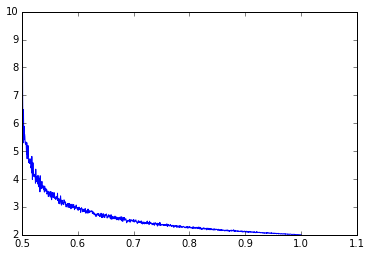

In [91]:
samples = 1000
def apocalypse_time(p):
    times = []
    for i in range(1, samples):
        X = 1
        current_gen = 1
        while X > 0:
            X = nth_generation(p, X)
            current_gen += 1
        times.append(current_gen)
    return sum(times) / len(times)

P = [0.5 + 0.5 * (k / 1000) for k in range(1, 1001)]
times = []
for p in P:
    times.append(apocalypse_time(p))
plot.plot(P, times)
plot.title("A(p)")
plot.show()

Искомая функция должна удовлетворять следующим условиям:
$$f(0.5) = \infty$$
$$f(1) = 2$$
Будем искать функцию f в виде
$$f(x) = a + \frac{b}{(x - 0.5)^c}$$
Воспользуемся методом наименьших квадратов.

[a, b, c] = [-1.61645583  3.24825176  0.14845221]
sum err sq 8.45258533958


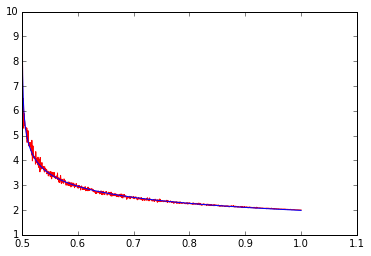

In [143]:
from scipy.optimize import minimize, leastsq
from math import log

def flog(params, xs):
    a, b, c = params
    return list(map(lambda x: a + b / ((x - .5) ** c), xs))

def error(params, x, y, f):
    return [x - y for (x, y) in zip(f(params, x), y)]

def sumerrsq(params, x, y, f):
    a = error(params, x, y, f)
    return sum(map(lambda x: x ** 2, a))

def applyleastsq(f, origin):
    res = leastsq(error, origin[:], args=(P, times, f))[0]
    print("[a, b, c] = " + str(res))
    print("sum err sq " + str(sumerrsq(res, P, times, f)))
    plot.plot(P, times, 'r')
    plot.plot(P, f(res, P))
    plot.show()

origin = (1, 1, 1)
applyleastsq(flog, origin)

Найдём доверительный интервал алгоритмически. Пусть $T[1], \ldots, T[N]$ -- <b>отсортированная</b> выборка случайной величины $\eta$ (момент остановки). Если мы хотим доверительный интервал уровень доверия $\gamma$, то нам нужно взять, скажем, $\frac{1 - \gamma}{2}$ и $\frac{1 + \gamma}{2}$ квантили распределения $\eta$. Поскольку распределение $\eta$ мы не знаем, возьмём квантили эмперического распределения. То есть $T[\frac{1 - \gamma}{2}N]$ и $T[\frac{1 + \gamma}{2}N]$.

In [179]:
from math import floor

N = 1000
def sorted_sample(p):
    times = []
    for i in range(0, N):
        X = 1
        step = 1
        while X > 0:
            X = nth_generation(p, X)
            step += 1
        times.append(step)
    return sorted(times)

def conf_interval(p, gamma):
    T = sorted_sample(p)
    mi, ma = floor((1 - gamma) / 2 * N), min(floor((1 + gamma) / 2 * N), N - 1)
    return (T[mi], T[ma])


#Pconf = [0.5 + 0.5 * (k / 20) for k in range(1, 21)]
Pconf = [0.501, 0.525, 0.55, 0.6, 0.7, 0.8, 0.9, 1]
Gamma = [k / 10 for k in range(0, 11)]

for p in Pconf:
    for gamma in Gamma:
        print("(p, gamma) = " + str((p, gamma)) + ", interval is " + str(conf_interval(p, gamma)))

(p, gamma) = (0.501, 0.0), interval is (3, 3)
(p, gamma) = (0.501, 0.1), interval is (2, 3)
(p, gamma) = (0.501, 0.2), interval is (2, 3)
(p, gamma) = (0.501, 0.3), interval is (2, 3)
(p, gamma) = (0.501, 0.4), interval is (2, 4)
(p, gamma) = (0.501, 0.5), interval is (2, 5)
(p, gamma) = (0.501, 0.6), interval is (2, 5)
(p, gamma) = (0.501, 0.7), interval is (2, 7)
(p, gamma) = (0.501, 0.8), interval is (2, 10)
(p, gamma) = (0.501, 0.9), interval is (2, 24)
(p, gamma) = (0.501, 1.0), interval is (2, 1088)
(p, gamma) = (0.525, 0.0), interval is (2, 2)
(p, gamma) = (0.525, 0.1), interval is (2, 3)
(p, gamma) = (0.525, 0.2), interval is (2, 3)
(p, gamma) = (0.525, 0.3), interval is (2, 3)
(p, gamma) = (0.525, 0.4), interval is (2, 3)
(p, gamma) = (0.525, 0.5), interval is (2, 4)
(p, gamma) = (0.525, 0.6), interval is (2, 5)
(p, gamma) = (0.525, 0.7), interval is (2, 6)
(p, gamma) = (0.525, 0.8), interval is (2, 8)
(p, gamma) = (0.525, 0.9), interval is (2, 12)
(p, gamma) = (0.525, 1.0), i

## Вероятность вырождения в случае X_0 = N
Если изменить начальные условия и положить $X_0 = N$, то можно считать, что в начале есть $N$ независимых процессов Гальтона-Ватсона $X_n^{(1)}, \ldots, X_n^{(N)}$, и процесс $Y_n = \sum_{i = 1}^{N} X_n^{(i)}$ выродится, если каждый из $X_n^{(i)}$ выродится. Но они независимы, значит, вероятности вырождения перемножаются и искомая вероятность вырождения -- это $\min \{1, \frac{p^n}{q^n}\}$